<a href="https://colab.research.google.com/github/sriran/first-contributions/blob/master/sentiment_classification_imdb_reviews_using_TFHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import nltk


In [2]:
(train_examples,test_examples),ds_info=tfds.load('imdb_reviews',split=['train','test'],batch_size=-1,as_supervised=True,with_info=True)
print('info', ds_info)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBUPTFZ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBUPTFZ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBUPTFZ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
info tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, A

In [3]:
train_data,train_labels=tfds.as_numpy(train_examples)
test_data,test_labels=tfds.as_numpy(test_examples)

In [4]:
embedding='https://tfhub.dev/google/nnlm-en-dim50/2'
hub_layer=hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable=True)
hub_layer(train_data[:3])



<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [13]:
model=tf.keras.Sequential()
model.add(hub_layer)
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [15]:
x_val=train_data[:10000]
p_x_train=train_data[10000:]
y_val=train_labels[:10000]
p_y_train=train_labels[10000:]


In [8]:
print(y_val[:3])

[0 0 0]


In [16]:
history = model.fit(p_x_train,
                    p_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                    )


Epoch 1/10
30/30 [==============================] - 2s 67ms/step - loss: 0.5510 - accuracy: 0.6683 - val_loss: 0.4854 - val_accuracy: 0.7769
Epoch 2/10
30/30 [==============================] - 2s 63ms/step - loss: 0.3212 - accuracy: 0.9213 - val_loss: 0.3696 - val_accuracy: 0.8405
Epoch 3/10
30/30 [==============================] - 2s 62ms/step - loss: 0.1883 - accuracy: 0.9728 - val_loss: 0.3178 - val_accuracy: 0.8578
Epoch 4/10
30/30 [==============================] - 2s 62ms/step - loss: 0.1162 - accuracy: 0.9875 - val_loss: 0.3002 - val_accuracy: 0.8657
Epoch 5/10
30/30 [==============================] - 2s 62ms/step - loss: 0.0763 - accuracy: 0.9942 - val_loss: 0.2982 - val_accuracy: 0.8713
Epoch 6/10
30/30 [==============================] - 2s 62ms/step - loss: 0.0525 - accuracy: 0.9973 - val_loss: 0.3045 - val_accuracy: 0.8704
Epoch 7/10
30/30 [==============================] - 2s 63ms/step - loss: 0.0375 - accuracy: 0.9989 - val_loss: 0.3123 - val_accuracy: 0.8717
Epoch 8/10
30

In [17]:
results = model.evaluate(test_data, test_labels)

print(results)


782/782 [==============================] - 3s 4ms/step - loss: 0.3797 - accuracy: 0.8532
[0.3797491490840912, 0.8532400131225586]


In [18]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

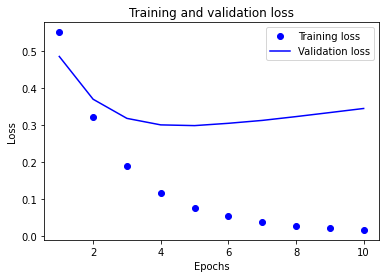

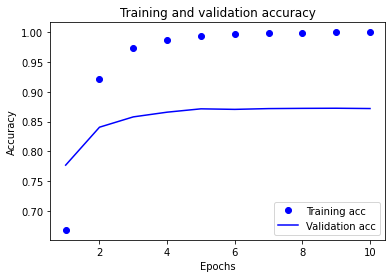

In [19]:
import matplotlib.pyplot as plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
